# Assignment 3: Web Scraping

# Q1. Write a python program which searches all the product under a particular product vertical from www.amazon.in. 
The product verticals to be searched will be taken as input from user.
For e.g. If user input is ‘guitar’. Then search for guitars.

In [1]:
#firstly we'll install selenium library

In [2]:
pip install --upgrade pip --trusted-host pypi.org --trusted-host files.pythonhosted.org

  Attempting uninstall: pip
    Found existing installation: pip 21.1.1
    Uninstalling pip-21.1.1:
      Successfully uninstalled pip-21.1.1



In [3]:
pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pip setuptools

Note: you may need to restart the kernel to use updated packages.


In [4]:
#importing all required libraries to work on selenium

In [65]:
import selenium
import pandas as pd
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
#Taking user input to search

1. first get the webpage www.amazon.in

In [66]:
driver = webdriver.Chrome(r"C:\Users\Pooja.Mishra\Downloads\chromedriver_win32\chromedriver.exe")

In [67]:
url = 'https://www.amazon.in/'
driver.get(url)
search_box = input("Please enter the data: ")    # user input for searching
input_element = driver.find_element_by_id("twotabsearchtextbox")   #Getting the Search box
input_element.send_keys(search_box)   #Send user input in search box
input_element.send_keys(Keys.ENTER)  #Automate Enter Button

Please enter the data: laptops


# Q2) In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a dataframe and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. 
Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of
Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details"
and “Product URL”. In case, if any of the details are missing for any of the product then
replace it by “-“.

In [69]:
# Firstly we'll get all the urls of all required pages after that will scrap the data by getting its urls:
urls =[] #all products urls
 #for loop for scrapping 3 page
    
time.sleep(3)
start=0
end=3
for page in range(start,end):
    laptop_brand = driver.find_elements_by_xpath("//span[@class='a-size-medium a-color-base a-text-normal']")
    
for page in range(0,3):
    product_url = driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")  #Scrapping product urls
    for i in product_url:
        urls.append(i.get_attribute('href'))
    
    count = len(laptop_brand)
    i = len(laptop_brand)
    if count<=23:
        next_page_click=driver.find_element_by_xpath("//li[@class='a-last']/a") #getting the next page path
        next_page_click.click()
        time.sleep(3)
             
    
    time.sleep(2)   
time.sleep(2)
len(urls) #Here we can get the all product urls

67

In [70]:


#Scrapping data from urls of 3 pages.
from selenium.common.exceptions import NoSuchElementException
time.sleep(2)
brand_name =[]
product_name=[]
deliveries=[]
product_price=[]
Details=[]
Availability_stock=[]
star_Rating =[]
no_Ratings =[]
replacement_days=[]
for i in urls:
    driver.get(i)
    #Scrapping brand of products
    try:
        laptop_brand = driver.find_element_by_xpath("//span[@id='productTitle']")#Scraping the brand name
        brand_name.append(laptop_brand.text.strip().split(' ')[0].strip())
    except NoSuchElementException:
        brand_name.append("--")
    #Scrapping products name
    try:
        laptop_brand = driver.find_element_by_xpath("//span[@id='productTitle']")#Scraping the brand name
        product_name.append(laptop_brand.text)
    except NoSuchElementException:
        product_name.append("--")
        
        
    try:
       #Scrapping the data 'Expected Delivery'
        delivery=driver.find_element_by_xpath("//div[@id='ddmDeliveryMessage']/b") #getting the rating stars elements
        deliveries.append(delivery.text)#appending the text in Product Name list
    except NoSuchElementException:
        deliveries.append("--")
    try:
      #Scrapping the Price Data
        price=driver.find_element_by_xpath("//span[@id='priceblock_ourprice']") #getting the price elements
        product_price.append(price.text)#appending the text in Product Name list
    except NoSuchElementException:
        product_price.append("--")
    #Scrapping other details of products
    try:
        desc=driver.find_element_by_xpath('//div[@class="a-section a-spacing-medium a-spacing-top-small"]/ul')#scraping description from the xpath
        Details.append(desc.text)#appending the details in list
    except NoSuchElementException:
        Details.append("--")
    try:
        #Scrapping availability data
        avail_stock=driver.find_element_by_xpath('//div[@id="availability_feature_div"]/div')
        Availability_stock.append(avail_stock.text)   
        Availability_stock
    except NoSuchElementException:
        Availability_stock.append("--")
    try:
       #Scrapping Ratings
        stars=driver.find_element_by_xpath("//a[@class='a-popover-trigger a-declarative']/i/span") 
        star_Rating.append(stars.get_attribute("innerHTML")) 
    except NoSuchElementException:
        star_Rating.append("--")
    try:
        #Scrapping No. of Ratings
        no_rating=driver.find_element_by_xpath("//span[@id='acrCustomerReviewText']")
        no_Ratings.append(no_rating.text)
    except NoSuchElementException:
        no_Ratings.append("--")
    try:
        #Scrapping return/ Exchange data
        replacement=driver.find_elements_by_xpath("//div[@class='a-section a-spacing-none icon-content']/a")#locating the rating
        for i in replacement:
            if "Replacement" in i.text:
                replacement_days.append(i.text)
        isAvailable = len(replacement_days)
        if isAvailable==0:
            replacement_days.append("--")#appending the replacement data in list
    except NoSuchElementException:
        replacement_days.append("--")
    time.sleep(2)


In [72]:
#Here we are testing the outputs data of all required parameters of products. We can get all data by running the particular tag
#brand_name
product_name
#product_price
#deliveries
#Details
#Availability_stock
#star_Rating
#no_Ratings
#replacement_days

['ASUS VivoBook 14 (2020) Intel Core i5-1035G1 10th Gen, 14-inch (35.56 cms) FHD Thin and Light Laptop (8GB RAM/1TB HDD/Windows 10/Integrated Graphics/Slate Grey/1.6-inch Kg), X415JA-EK501T',
 'ASUS VivoBook S14 Intel Core i5-1035G1 10th Gen 14" (35.56cms) FHD Thin and Light Laptop (8GB RAM/512GB NVMe SSD + 32GB Optane Memory/Windows 10/MS Office 2019/Silver Blue/1.35 kg), S403JA-BM033TS',
 'HP 15 Entry Level 15.6-inch (39.62 cms) HD Laptop (AMD 3020e/4GB/1TB HDD/Windows 10 Home/Jet Black/1.74 Kg), 15s-gy0003AU',
 'ASUS VivoBook 15 (2020), 39.6 cm HD, Dual Core Intel Celeron N4020, Thin and Light Laptop (4GB RAM/256GB SSD/Integrated Graphics/Windows 10 Home/Transparent Silver/1.8 Kg), X515MA-BR002T',
 'Lenovo Ideapad S145 AMD RYZEN 3 3200U 15.6-inch (39.62 cms) FHD Laptop (4GB/1TB/Windows 10/Office 2019/Grey/1.85Kg),81UT001CIN',
 'Microsoft Surface Laptop 4 AMD Ryzen™ 5 4680U 13.5 inch Touchscreen Laptop (8GB/256GB SSD/Windows 10 Home /AMD Radeon™ Graphics/Platinum/1.265 kg)',
 'Lenovo

In [74]:
#creating a dataframe of all products of all 3 pages
Laptops=pd.DataFrame({'Brand':brand_name,
                'Product':product_name,
                'Price':product_price,
                'Expected_Delivery':deliveries,
                'Product_Url':urls,
                'Available_stock':Availability_stock,
                'Ratings':star_Rating,
                'no_of_Ratings':no_Ratings,
                'Replacement_Details':replacement_days,
                'Product_Details':Details})
Laptops #Printing the dataframe

,Brand,Product,Price,Expected_Delivery,Product_Url,Available_stock,Ratings,no_of_Ratings,Replacement_Details,Product_Details
0,ASUS,ASUS VivoBook 14 (2020) Intel Core i5-1035G1 1...,"₹ 44,990.00","Tuesday, June 15",https://www.amazon.in/gp/slredirect/picassoRed...,In stock.,3.8 out of 5 stars,92 ratings,7 Days Replacement,"Processor: 10th Gen Intel Core i5-1035G1, 1.0 ..."
1,ASUS,ASUS VivoBook S14 Intel Core i5-1035G1 10th Ge...,"₹ 58,990.00",June 16 - 17,https://www.amazon.in/gp/slredirect/picassoRed...,In stock.,4.4 out of 5 stars,186 ratings,7 Days Replacement,Processor: 10th Gen Intel Core i5-1035G1 Proce...
2,HP,HP 15 Entry Level 15.6-inch (39.62 cms) HD Lap...,"₹ 25,990.00","Tuesday, June 15",https://www.amazon.in/HP-15-6-inch-Laptop-Wind...,In stock.,3.7 out of 5 stars,877 ratings,7 Days Replacement,Processor: AMD 3020e (Base Clock Speed 1.2 GHz...
3,ASUS,"ASUS VivoBook 15 (2020), 39.6 cm HD, Dual Core...","₹ 22,990.00",June 16 - 20,https://www.amazon.in/ASUS-VivoBook-Integrated...,"In stock on June 14, 2021.\nOrder it now.",3.9 out of 5 stars,470 ratings,7 Days Replacement,"Processor: Intel Celeron N4020, 1.1 GHz Base S..."
4,Lenovo,Lenovo Ideapad S145 AMD RYZEN 3 3200U 15.6-inc...,"₹ 29,990.00",June 14 - 18,https://www.amazon.in/Lenovo-Ideapad-15-6-inch...,Available to ship in 1-2 days.,3.3 out of 5 stars,781 ratings,7 Days Replacement,"Processor: AMD Ryzen 3 3200U processor, 2.6 Gh..."
...,...,...,...,...,...,...,...,...,...,...
62,Acer,Acer Extensa 15 Intel Pentium Silver N5030 Pro...,"₹ 25,990.00","Sunday, June 13",https://www.amazon.in/Acer-Processor-Integrate...,In stock.,3.0 out of 5 stars,2 ratings,7 Days Replacement,Processor : Intel Pentium Silver N5030 process...
63,(Renewed),(Renewed) AVITA LIBER NS14A8INF541-MB 14-inch ...,"₹ 34,990.00","Tuesday, June 15",https://www.amazon.in/Renewed-AVITA-NS14A8INF5...,Only 1 left in stock.,--,--,7 Days Replacement,This Renewed product is tested to work and loo...
64,Lenovo,Lenovo IdeaPad Slim 3 Intel Celeron N4020 15.6...,"₹ 29,995.00",June 18 - 19,https://www.amazon.in/Lenovo-IdeaPad-39-62cms-...,Usually dispatched in 2 to 3 days.,4.0 out of 5 stars,227 ratings,7 Days Replacement,Processor: Intel Celeron N4020 | Speed: 1.1 GH...
65,ASUS,ASUS VivoBook Ultra 15 AMD Ryzen 7 4700U 15.6-...,"₹ 64,272.00","Sunday, June 13",https://www.amazon.in/gp/slredirect/picassoRed...,In stock.,4.0 out of 5 stars,80 ratings,7 Days Replacement,"Processor: AMD Ryzen 7 4700U Processor, 2.0 GH..."


# 3. Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [1]:
#importing all required libraries
import selenium
import pandas as pd
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

In [2]:
driver = webdriver.Chrome(r"C:\Users\Pooja.Mishra\Downloads\chromedriver_win32\chromedriver.exe")

1. first get the webpage images.google.com

In [3]:
url = 'https://images.google.com/?gws_rd=ssl' # getting the url
driver.get(url)

In [4]:
search = driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search 

<selenium.webdriver.remote.webelement.WebElement (session="d9b96496db39f31c8a2077c5aba9b793", element="dc347d7f-96dc-44b3-afb9-5f15d2f2f7f4")>

In [5]:
search.send_keys("fruits") # entering fruits in search bar

In [6]:
#click on search button 
search_btn = driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_btn.click()

In [7]:
#As we are on the page with images of fruits will Now scrap 100 images

In [8]:
#Scroll to the end of the page to avoid any future problem
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions

In [9]:
#Locating the fruits images to be scraped from the current page 
img_Fruits = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
print (len(img_Fruits))

100


image url : 
image url : 
image url : 
image url : 
image url : 

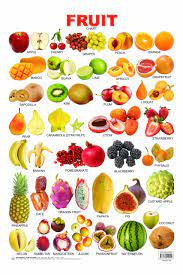
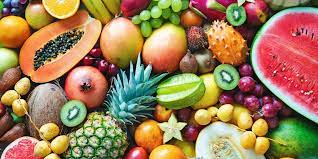
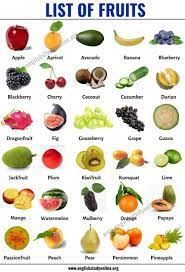
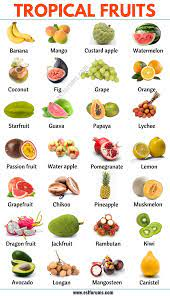
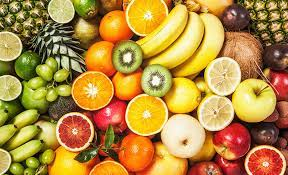

In [10]:
for i in range(0, len(img_Fruits)-95):
    url = img_Fruits[i].get_attribute('src')

So total 400 images are there; elements can be checked by (img_fruits)

In [12]:
import os
asset_dir = "temp"
img_urls = set()
for i in range(0, len(img_Fruits)-95):
        img_urls.add(img_Fruits[i].get_attribute('src'))
              

In [26]:
#downloading all extracting images
import base64
from PIL import Image
import io

path=r'C:\Users\Pooja.Mishra\Desktop\Capture..sl.png' # saving images in path
img = Image.open(path)


ERROR - COULD NOT SAVE 0 - cannot identify image file <_io.BytesIO object at 0x00000268BD816AE0>

ERROR - COULD NOT SAVE 1 - cannot identify image file <_io.BytesIO object at 0x00000268BD816AE0>

ERROR - COULD NOT SAVE 2 - cannot identify image file <_io.BytesIO object at 0x00000268BD816AE0>

ERROR - COULD NOT SAVE 3 - cannot identify image file <_io.BytesIO object at 0x00000268BD816AE0>

ERROR - COULD NOT SAVE 4 - cannot identify image file <_io.BytesIO object at 0x00000268BD816AE0>

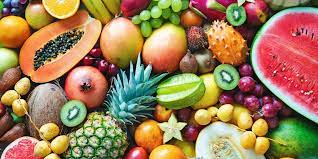
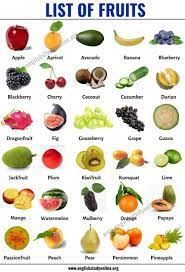
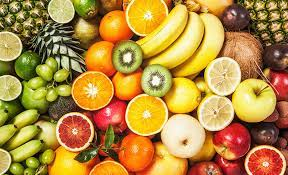
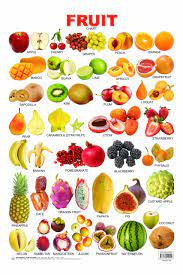
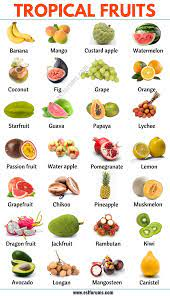

In [20]:
#Downloading the images using exception if any downloading not allowed
for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content

    except Exception as e:
            print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

In [ ]:
In similar way  the images of cars and machine learning can be scrapped and downloaded.

Ques4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on
www.flipkart.com and scrape following details for all the search results displayed on 1st page.
Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”,
“Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display
Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”.
Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe
and CSV.

In [61]:
#importing all libraries 
import pandas as pd
import selenium
from selenium import webdriver
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

In [62]:
#Getting the url
driver = webdriver.Chrome(r"C:\Users\Pooja.Mishra\Downloads\chromedriver_win32\chromedriver.exe") 
url = "https://www.flipkart.com/"
driver.get(url)

In [63]:
#Search for Iphone 11
search_product=driver.find_element_by_class_name("_3704LK")   #search bar
search_product.send_keys('Iphone 11')     #Entering product name

In [64]:
#Click on Search button
button=driver.find_element_by_class_name('L0Z3Pu')
button.click()

Now scraping the required details
Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”


In [65]:
#Creating empty lists for scraping data
Brand_name=[]
Smartphone_name=[]
Smartphone_colour=[]
RAM=[]
#ROM=[] NA
Pri_Camera=[]
Sec_Camera=[]
Display_size=[]
Display_Resolution=[]
Processor=[]
Processor_core=[]
#Battery_capacity=[] NA
Price=[]
Product_url=[]

#scraping the Brand_name, Smartphone name, Smartphone_colour 
brand_elements=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
for i in brand_elements:
    Brand_name.append(i.text.strip().split(' ')[0].strip())
    Smartphone_name1.append(i.text.strip().split(' ')[1].strip())
    Smartphone_name2.append(i.text.strip().split(' ')[2].strip())
    Smartphone_name.append(i.text)
    Smartphone_name=Smartphone_name1+Smartphone_name2
    Smartphone_colour.append(i.text.strip().split(' ')[3].strip())
#checking the length of data    
print (len(Brand_name))
print (len(Smartphone_name))
print (len(Smartphone_colour))




24
96
24


In [74]:
#Scraping data for ROM  
ROM_elements=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[1]")
for i in ROM_elements:
    ROM.append(i.text)

#Scraping data for Display_size & Display_Resolution
display_elements=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[2]")
for i in display_elements:
    Display_size.append(i.text.strip().split(' ')[0].strip())
    Display_Resolution.append(i.text.strip().split(' ')[4].strip())

#Scraping data for processor
processor_elements=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[4]")
for i in processor_elements:
    Processor_core.append(i.text)

#Scraping data for price
price_elements=driver.find_elements_by_xpath("//div[@class='_25b18c']")
for i in price_elements:
    Price.append(i.text.strip().split('\n')[0])
    
#Scraping product url
product_urls=[]
url_elements=driver.find_elements_by_xpath("//div[@class='_2kHMtA']/a")
for i in url_elements:
    product_urls.append(i.get_attribute('href'))
product_urls
    
#Scraping for camera
camera_elements=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[3]")
for i in camera_elements:
    Pri_Camera.append(i.text.strip().split('|')[0].strip())
    Sec_Camera.append(i.text.strip().split('|')[1].strip())

#checking the length of data     
print (len(ROM))    
print (len(product_urls))
print (len(Price))
print (len(Display_size))
print (len(Display_Resolution))
print (len(Processor_core))
print (len(Sec_Camera))
print (len(Pri_Camera))

96
24
48
48
48
48
48
48


In [75]:
#RAM elements not availble in webpage
#Battery capacity data not available in webpage



In [76]:
#Creating the dataframe
Iphone11=pd.DataFrame({'Brand':Brand_name[:24],
                'Smartphone':Smartphone_name[:24],
                'Color':Smartphone_colour[:24],
                'Pri_Camera':Pri_Camera[:24],
                'Sec_Camera':Sec_Camera[:24],
                'Processor_core':Processor_core[:24],
                'Processor':Processor_core[:24],
                'Display_size':Display_size[:24],
                'Display_Resolution':Display_Resolution[:24],
                'ROM':ROM[:24],
                'Price':Price[:24],
                'Product_urls':product_urls[:24]})      

Iphone11  #Printing the Dataframe                             
               
            
                      

,Brand,Smartphone,Color,Pri_Camera,Sec_Camera,Processor_core,Processor,Display_size,Display_Resolution,ROM,Price,Product_urls
0,APPLE,iPhone,"(Black,",12MP + 12MP,12MP Front Camera,A13 Bionic Chip Processor,A13 Bionic Chip Processor,15.49,Liquid,64 GB ROM,"₹49,999",https://www.flipkart.com/apple-iphone-11-black...
1,APPLE,iPhone,"(Red,",12MP + 12MP,12MP Front Camera,A13 Bionic Chip Processor,A13 Bionic Chip Processor,15.49,Liquid,64 GB ROM,"₹49,999",https://www.flipkart.com/apple-iphone-11-red-6...
2,APPLE,iPhone,"(Black,",12MP + 12MP,12MP Front Camera,A13 Bionic Chip Processor,A13 Bionic Chip Processor,15.49,Liquid,64 GB ROM,"₹56,999",https://www.flipkart.com/apple-iphone-11-black...
3,APPLE,iPhone,"(Purple,",12MP + 12MP,12MP Front Camera,A13 Bionic Chip Processor,A13 Bionic Chip Processor,15.49,Liquid,128 GB ROM,"₹56,999",https://www.flipkart.com/apple-iphone-11-purpl...
4,APPLE,iPhone,"(White,",12MP + 12MP,12MP Front Camera,A13 Bionic Chip Processor,A13 Bionic Chip Processor,15.49,Liquid,64 GB ROM,"₹49,999",https://www.flipkart.com/apple-iphone-11-white...
5,APPLE,iPhone,"(Purple,",12MP + 12MP,12MP Front Camera,A13 Bionic Chip Processor,A13 Bionic Chip Processor,15.49,Liquid,128 GB ROM,"₹49,999",https://www.flipkart.com/apple-iphone-11-purpl...
6,APPLE,iPhone,"(White,",12MP + 12MP,12MP Front Camera,A13 Bionic Chip Processor,A13 Bionic Chip Processor,15.49,Liquid,64 GB ROM,"₹56,999",https://www.flipkart.com/apple-iphone-11-white...
7,APPLE,iPhone,"(Green,",12MP + 12MP,12MP Front Camera,A13 Bionic Chip Processor,A13 Bionic Chip Processor,15.49,Liquid,64 GB ROM,"₹49,999",https://www.flipkart.com/apple-iphone-11-green...
8,APPLE,iPhone,"(Yellow,",12MP + 12MP,12MP Front Camera,A13 Bionic Chip Processor,A13 Bionic Chip Processor,15.49,Liquid,64 GB ROM,"₹49,999",https://www.flipkart.com/apple-iphone-11-yello...
9,Apple,iPhone,"(Black,",12MP + 12MP,12MP Front Camera,A13 Bionic Chip Processor,A13 Bionic Chip Processor,15.49,Liquid,64 GB ROM,"₹49,999",https://www.flipkart.com/apple-iphone-11-black...


Ques 5) Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on
google maps.

In [1]:
#importing all libraries 
import pandas as pd
import selenium
from selenium import webdriver
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

In [28]:
#Using API to get the address of any location (Getting present address long & latitute)
import urllib3
import json
http = urllib3.PoolManager(1, headers={'user-agent': 'my-test-app'})

url = 'https://nominatim.openstreetmap.org/search?country=India&city=Gurugram&postalcode=122001&street=Sector-14+7&format=json&limit=1'

resp = http.request('GET', url)

json.loads(resp.data.decode())

[{'place_id': 4050536,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'node',
  'osm_id': 477905130,
  'boundingbox': ['28.4736792', '28.4737792', '77.0478419', '77.0479419'],
  'lat': '28.4737292',
  'lon': '77.0478919',
  'display_name': 'Sector-14 Market, Mehrauli-Gurgaon Road, Sector 14, Gurgaon, Gurugram, Haryana, 122001, India',
  'class': 'amenity',
  'type': 'parking',
  'importance': 0.5309999999999999}]

Q6)Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 –
September 20) from trak.in.

In [8]:
#Getting the driver
driver= webdriver.Chrome(r"C:\Users\Pooja.Mishra\Downloads\chromedriver_win32\chromedriver.exe")  
time.sleep(4)

url = "https://trak.in/"
driver.get(url)
time.sleep(6)


In [10]:
#Automate clicking on 'Funding Deals' to scrape the data
funding_deals_button=driver.find_element_by_xpath("//li[@class='menu-have-icon menu-icon-type-fontawesome menu-item menu-item-type-post_type menu-item-object-page better-anim-fade menu-item-51510']")
funding_deals_button.click()

In [75]:
#Getting the required element
SMRtable = driver.find_elements_by_xpath('//*[@id="tablepress-48"]/tbody/tr')
SMRtable

[<selenium.webdriver.remote.webelement.WebElement (session="6d8196f182dec735d82fa4e4ec7076e8", element="11125332-2cce-44e2-b6b6-0658e5f8b940")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d8196f182dec735d82fa4e4ec7076e8", element="3019f123-587e-4d27-8843-5e88ad49e9d2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d8196f182dec735d82fa4e4ec7076e8", element="d71ddad5-d147-4bd3-bd77-8535c7541bee")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d8196f182dec735d82fa4e4ec7076e8", element="45e511f6-1448-4c2b-9424-72b49a2fa01d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d8196f182dec735d82fa4e4ec7076e8", element="30a00fe1-0376-44d9-9c4b-3c27750c6603")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d8196f182dec735d82fa4e4ec7076e8", element="19d09807-5706-452b-ab26-3d17121c9016")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d8196f182dec735d82fa4e4ec7076e8", element="87046e47-1f60-4b79-aaf1-66

In [94]:
#Getting the table table wise by tag name td for month of july
data = []
for row in SMRtable:
    cols = row.find_elements_by_tag_name("td")[0:9]
    cols = [ele.text.strip() for ele in cols]
    data.append([ele.replace('\n','') for ele in cols if ele])
print(data)
                 

[['1', '15/07/2020', 'Flipkart', 'E-commerce', 'E-commerce', 'Bangalore', 'Walmart Inc', 'M&A', '1,200,000,000'], ['2', '16/07/2020', 'Vedantu', 'EduTech', 'Online Tutoring', 'Bangalore', 'Coatue Management', 'Series D', '100,000,000'], ['3', '16/07/2020', 'Crio', 'EduTech', 'Learning Platform for Developers', 'Bangalore', '021 Capital', 'pre-Series A', '934,160'], ['4', '14/07/2020', 'goDutch', 'FinTech', 'Group Payments', 'Mumbai', 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.', 'Seed', '1,700,000'], ['5', '13/07/2020', 'Mystifly', 'Airfare Marketplace', 'Ticketing, Airline Retailing, and Post-Ticketing Services', 'Singapore and Bangalore', 'Recruit Co. Ltd.', 'pre-Series B', '3,300,000'], ['6', '09/07/2020', 'JetSynthesys', 'Gaming and Entertainment', 'Gaming and Entertainment', 'Pune', 'Adar Poonawalla and Kris Gopalakrishnan.', 'Venture-Series Unknown', '400,000'], ['7', '10/07/2020', 'gigIndia', 'Marketplace', 'Crowd Sourcing, Freelance', 'Pu

In [93]:
InvestmentData = []
months = [48,49,50]
for month in months:
    
    SMRtable = driver.find_elements_by_xpath('//*[@id="tablepress-48"]/tbody/tr')
    for row in SMRtable:
        cols = row.find_elements_by_tag_name("td")[1:9]
        cols = [ele.text.strip() for ele in cols]
        data.append([ele.replace('\n','') for ele in cols if ele])
    print(data)
                 

[['15/07/2020', 'Flipkart', 'E-commerce', 'E-commerce', 'Bangalore', 'Walmart Inc', 'M&A', '1,200,000,000'], ['16/07/2020', 'Vedantu', 'EduTech', 'Online Tutoring', 'Bangalore', 'Coatue Management', 'Series D', '100,000,000'], ['16/07/2020', 'Crio', 'EduTech', 'Learning Platform for Developers', 'Bangalore', '021 Capital', 'pre-Series A', '934,160'], ['14/07/2020', 'goDutch', 'FinTech', 'Group Payments', 'Mumbai', 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.', 'Seed', '1,700,000'], ['13/07/2020', 'Mystifly', 'Airfare Marketplace', 'Ticketing, Airline Retailing, and Post-Ticketing Services', 'Singapore and Bangalore', 'Recruit Co. Ltd.', 'pre-Series B', '3,300,000'], ['09/07/2020', 'JetSynthesys', 'Gaming and Entertainment', 'Gaming and Entertainment', 'Pune', 'Adar Poonawalla and Kris Gopalakrishnan.', 'Venture-Series Unknown', '400,000'], ['10/07/2020', 'gigIndia', 'Marketplace', 'Crowd Sourcing, Freelance', 'Pune', 'Incubate Fund India and Beyon

In [12]:
# Here we are customizing the table to get all data of july, Aug & Sept funding deals.
InvestmentData = []
months = [48,49,50]
before_XPath = "//*[@id='tablepress-"
aftertd_XPath_2 = "]/tbody/tr"

for month in months:
    aftertd_XPath_1 = str(month)
    finalPath = before_XPath+aftertd_XPath_1+"'"+aftertd_XPath_2
    SMRtable = driver.find_elements_by_xpath(finalPath)
    for row in SMRtable:
        cols = row.find_elements_by_tag_name("td")[1:9]
        cols = [ele.text.strip() for ele in cols]
        InvestmentData.append([ele.replace('\n','') for ele in cols if ele])
print(InvestmentData)
    

[['15/07/2020', 'Flipkart', 'E-commerce', 'E-commerce', 'Bangalore', 'Walmart Inc', 'M&A', '1,200,000,000'], ['16/07/2020', 'Vedantu', 'EduTech', 'Online Tutoring', 'Bangalore', 'Coatue Management', 'Series D', '100,000,000'], ['16/07/2020', 'Crio', 'EduTech', 'Learning Platform for Developers', 'Bangalore', '021 Capital', 'pre-Series A', '934,160'], ['14/07/2020', 'goDutch', 'FinTech', 'Group Payments', 'Mumbai', 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.', 'Seed', '1,700,000'], ['13/07/2020', 'Mystifly', 'Airfare Marketplace', 'Ticketing, Airline Retailing, and Post-Ticketing Services', 'Singapore and Bangalore', 'Recruit Co. Ltd.', 'pre-Series B', '3,300,000'], ['09/07/2020', 'JetSynthesys', 'Gaming and Entertainment', 'Gaming and Entertainment', 'Pune', 'Adar Poonawalla and Kris Gopalakrishnan.', 'Venture-Series Unknown', '400,000'], ['10/07/2020', 'gigIndia', 'Marketplace', 'Crowd Sourcing, Freelance', 'Pune', 'Incubate Fund India and Beyon

In [16]:
# Creating data frame from array for month july, aug, sep and naming all columns
df=pd.DataFrame({})
df = pd.DataFrame(InvestmentData, columns =['Date', 'Startup Name', 'Industry','Sub-Vertical','City','Investors_Name','Investment_Type','Amount(USD)'])
print("\nFunding Deals (July20-Sep20) DataFrame: ")
df



Funding Deals (July20-Sep20) DataFrame: 


,Date,Startup Name,Industry,Sub-Vertical,City,Investors_Name,Investment_Type,Amount(USD)
0,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


Q7) Write a program to scrap all the available details of top 10 gaming laptops from digit.in.

In [3]:
#import all the required libraries
import pandas as pd
import selenium
from selenium import webdriver
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

In [5]:
#Getting the driver digit.in
driver= webdriver.Chrome(r"C:\Users\Pooja.Mishra\Downloads\chromedriver_win32\chromedriver.exe")  
time.sleep(4)
#Calling the url 
url = "https://www.digit.in/"
driver.get(url)
time.sleep(6)


In [13]:
#Clicking on search button  
search_button=driver.find_element_by_xpath("//div[@class='search']")
search_button.click()


In [14]:
#Entering 'top 10 gaming laptops' in Search box
search_box=driver.find_element_by_id('globalPageSearchText') #search bar
search_box.send_keys("top 10 gaming laptops")


In [21]:
#Automate 'Enter' key to get the products webpage
from selenium.webdriver.common.keys import Keys
search_box.send_keys(Keys.ENTER)

In [22]:
#Scraping the name of available products
products=driver.find_elements_by_xpath("//div[@class='searchProduct-desc']")
products_name=[]
for i in products:
    products_name.append(i.text)
products_name
    
        

['HP Envy 15-k006tx',
 "ASUS G53J - A 3D gamer's delight but we want more",
 'Asus G750JX-CV069P',
 'ASUS ROG Flow x13',
 'Lenovo IdeaPad Y570',
 'ASUS ROG Cetra',
 'HP Pavilion g6 - Multimedia and gaming on a budget',
 'MSI Z170A Gaming M7',
 'Top gaming laptops under Rs 1 lakh',
 'Top gaming laptops to target on Amazon India']

In [100]:
#Scraping all image urls
img_urls=[]
images_element=driver.find_elements_by_xpath("//div[@class='searchProduct-ickon']")
for i in images_element:
    img_urls.append(i.find_element_by_tag_name("img").get_attribute("src"));
img_urls
    

['https://static.digit.in/product/thumb_27861_product_td_300.jpeg',
 'https://static.digit.in/default/thumb_22670_default_td_300.jpg',
 'https://static.digit.in/product/thumb_27856_product_td_300.jpeg',
 'https://static.digit.in/product/thumb_185403_product_td_300.jpeg',
 'https://static.digit.in/default/thumb_22184_default_td_300.jpg',
 'https://static.digit.in/product/thumb_170594_product_td_300.jpeg',
 'https://static.digit.in/default/thumb_22293_default_td_300.jpg',
 'https://static.digit.in/product/thumb_46656_product_td_300.jpeg',
 'https://static.digit.in/default/thumb_87094_default_td_300.jpeg',
 'https://static.digit.in/default/thumb_171457_default_td_300.jpeg']

In [98]:
#Scraping the dates for all categories
category_element=driver.find_elements_by_xpath("*//div[@class='searchPage']/p")
categories=[]
for i in category_element:
    categories.append(i.text)
categories

['PRODUCTS',
 'PRODUCTS',
 'PRODUCTS',
 'PRODUCTS',
 'PRODUCTS',
 'PRODUCTS',
 'PRODUCTS',
 'PRODUCTS',
 'ARTICLES',
 'ARTICLES']

In [99]:
#Scraping the dates for all products & articles
date_element=driver.find_elements_by_xpath("*//div[@class='searchPage']/span")
date=[]
for i in date_element:
    date.append(i.text)
date
    

['Apr 09, 2019',
 'Apr 09, 2019',
 'Mar 20, 2021',
 'May 28, 2021',
 'Apr 09, 2019',
 'Oct 05, 2020',
 'Apr 09, 2019',
 'Sep 03, 2015',
 'Aug 03, 2017',
 'Oct 18, 2020']

In [101]:
#As we got all the data so creating the dataframe for all available details
gaming_laptops=pd.DataFrame({})
gaming_laptops['Products_name']=products_name
gaming_laptops['Category']=categories
gaming_laptops['Date']=date
gaming_laptops['Img_Url']=img_urls
gaming_laptops  #printing the dataframe


,Products_name,Category,Date,Img_Url
0,HP Envy 15-k006tx,PRODUCTS,"Apr 09, 2019",https://static.digit.in/product/thumb_27861_pr...
1,ASUS G53J - A 3D gamer's delight but we want more,PRODUCTS,"Apr 09, 2019",https://static.digit.in/default/thumb_22670_de...
2,Asus G750JX-CV069P,PRODUCTS,"Mar 20, 2021",https://static.digit.in/product/thumb_27856_pr...
3,ASUS ROG Flow x13,PRODUCTS,"May 28, 2021",https://static.digit.in/product/thumb_185403_p...
4,Lenovo IdeaPad Y570,PRODUCTS,"Apr 09, 2019",https://static.digit.in/default/thumb_22184_de...
5,ASUS ROG Cetra,PRODUCTS,"Oct 05, 2020",https://static.digit.in/product/thumb_170594_p...
6,HP Pavilion g6 - Multimedia and gaming on a bu...,PRODUCTS,"Apr 09, 2019",https://static.digit.in/default/thumb_22293_de...
7,MSI Z170A Gaming M7,PRODUCTS,"Sep 03, 2015",https://static.digit.in/product/thumb_46656_pr...
8,Top gaming laptops under Rs 1 lakh,ARTICLES,"Aug 03, 2017",https://static.digit.in/default/thumb_87094_de...
9,Top gaming laptops to target on Amazon India,ARTICLES,"Oct 18, 2020",https://static.digit.in/default/thumb_171457_d...
